In [1]:
import mysql.connector
import pandas as pd
import seaborn as sns


In [2]:
def connect_to_sql_db(host_name, user_name, user_password, db):
    dbconnection = mysql.connector.connect(
        host = host_name,
        user = user_name,
        passwd = user_password,
        database = db
    )
    print("Connection to MySQL DB successful")

    cursorx = dbconnection.cursor()

    return dbconnection, cursorx

def retrieve_data(query):
    cursor.execute(query)

    # Fetch column names
    column_names = [column[0] for column in cursor.description]

    # Fetch data rows
    rows = cursor.fetchall()

    # Create a Pandas DataFrame with column names and data
    data_frame = pd.DataFrame(rows, columns=column_names)

    return data_frame


In [3]:
# SQL database parameters
host = 'localhost'
user = 'root'
passwd = 'EdFaSdlE33#sql'
database = 'flightprices'

# Connect to database
cnx, cursor = connect_to_sql_db(host, user, passwd, database)


Connection to MySQL DB successful


In [4]:
#Data import query
import_data_query = "SELECT " \
                    "   timetilldeparture AS 'Time till departure'," \
                    "   AVG(price) AS 'Price', " \
                    "   WEEKDAY(departure_datetime) 'Day of the week' " \
                    "FROM prices " \
                    "GROUP BY " \
                    "   timetilldeparture, " \
                    "   WEEKDAY(departure_datetime) " \
                    "ORDER BY timetilldeparture ASC;"

price_days_till_flight = retrieve_data(import_data_query)

In [5]:
price_days_till_flight

,Time till departure,Price,Day of the week
0,NaN,65.207572,0
1,NaN,85.446552,1
2,NaN,87.038438,2
3,NaN,91.569157,3
4,NaN,69.348710,4
...,...,...,...
522,257.0,78.727209,3
523,258.0,82.250455,3
524,258.0,61.042326,4
525,259.0,61.042326,4


<Axes: xlabel='Time till departure', ylabel='Price'>

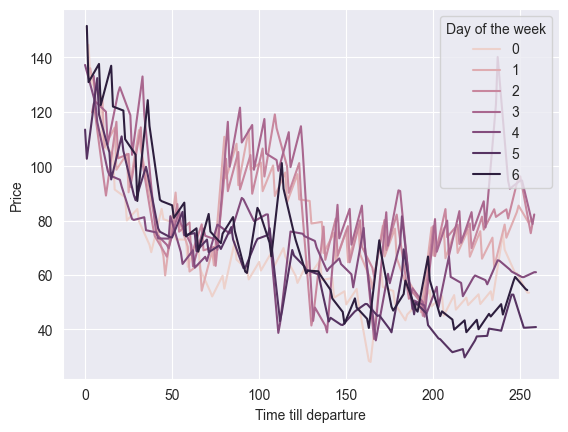

In [6]:
# Plot the data

sns.lineplot(data = price_days_till_flight, x = "Time till departure", y = 'Price', hue = "Day of the week")